# User-Defined Brightness Profiles

Sometimes more complex brightness profile is needed. As the class stores the deprojected pixel values, it is very easy to 'paste' on more complex structures. This Notebooks demonstrates how to use [`GoFish`](https://github.com/richteague/gofish) to read in a brightness profile and use it for your model.

In [1]:
! pip install gofish

In [2]:
# Prep the Notebook
from simple_disk import simple_disk
import matplotlib.pyplot as plt
from gofish import imagecube
import numpy as np

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


Text(0, 0.5, 'Brightness Temperature [K]')

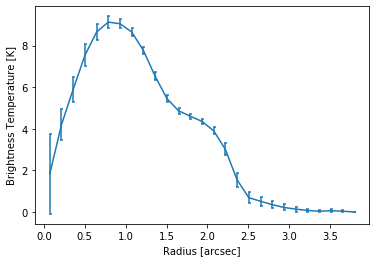

In [3]:
# Read in the eighth moment map of TW Hya, clipping down to an 8" field of view.
cube = imagecube('TWHya_CS_32_Fnu.fits', FOV=8.0)

# Convert the data from Jy/beam to K.
cube.data = cube.jybeam_to_Tb_RJ(cube.data)

# Calculate a radial profile.
x, y, dy = cube.radial_profile(inc=6.5, PA=151.0)

# Plot this to make sure it's what we expect.
fig, ax = plt.subplots()
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5)
ax.set_xlabel('Radius [arcsec]')
ax.set_ylabel('Brightness Temperature [K]')

In [4]:
# Now make a simple disk model.
disk = simple_disk(inc=25.0, PA=151.0, dist=60.1, mstar=0.65, FOV=8.0, r_max=200.0, Npix=256)

First or last value of `y` is non-zero and may cause issues with extrapolated values.


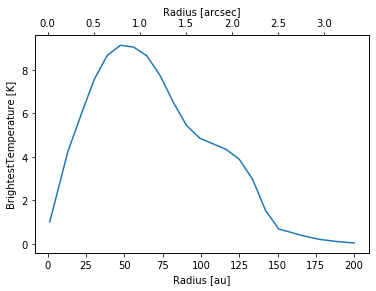

In [5]:
# Set the brightness temperature profile.
disk.interpolate_model(x=x, y=y, x_unit='arcsec', param='Tb')
disk.plot_brightness()

A similar approach can be used to set the linewidth profile using the argument `parameter='dV'`.

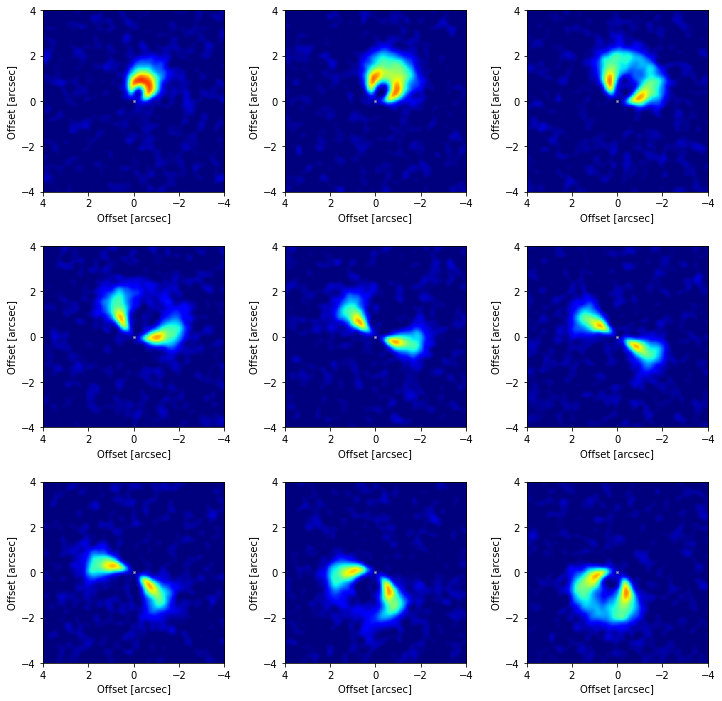

In [6]:
# Make the pseudo-cube.
velax = np.arange(-1250, 1500, 250)
cube = disk.get_cube(velax, bmaj=0.3, rms=0.2)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12), gridspec_kw=dict(wspace=0.3, hspace=0.3))
for a, ax in enumerate(axs.flatten()):
    ax.imshow(cube[a], origin='lower', extent=disk.extent_sky,
              vmin=0.0, vmax=9.0, cmap='jet')
    disk.format_sky_plot(ax)